In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from tensorflow.keras import models, layers, optimizers


2023-03-16 22:46:13.192811: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 22:46:13.439424: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-16 22:46:13.439447: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-16 22:46:14.066511: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [12]:
# Define the parameters for the simulated dataset
n_curves = 10000
curve_length = 1000
period_range = [20, 200]
depth_range = [0.01, 0.1]
duration_range = [0.01, 0.1]
stellar_radius_range = [0.5, 2.0]
stellar_mass_range = [0.5, 2.0]
noise_level_range = [0.001, 0.01]


Epoch 1/20


2023-03-16 22:54:14.508650: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 22:54:14.508855: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-16 22:54:14.508919: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-16 22:54:14.508963: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-16 22:54:14.509006: W tensorflow/c

250/250 [==============================] - 1s 3ms/step - loss: 0.1634 - accuracy: 0.9370 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9966 - val_loss: 1.6880e-04 - val_accuracy: 1.0000
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9983 - val_loss: 2.9343e-05 - val_accuracy: 1.0000
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 7.7166e-06 - val_accuracy: 1.0000
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 3.2252e-06 - val_accuracy: 1.0000
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 2.1255e-06 - val_accuracy: 1.0000
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 5.3478e-07 - val_accuracy: 

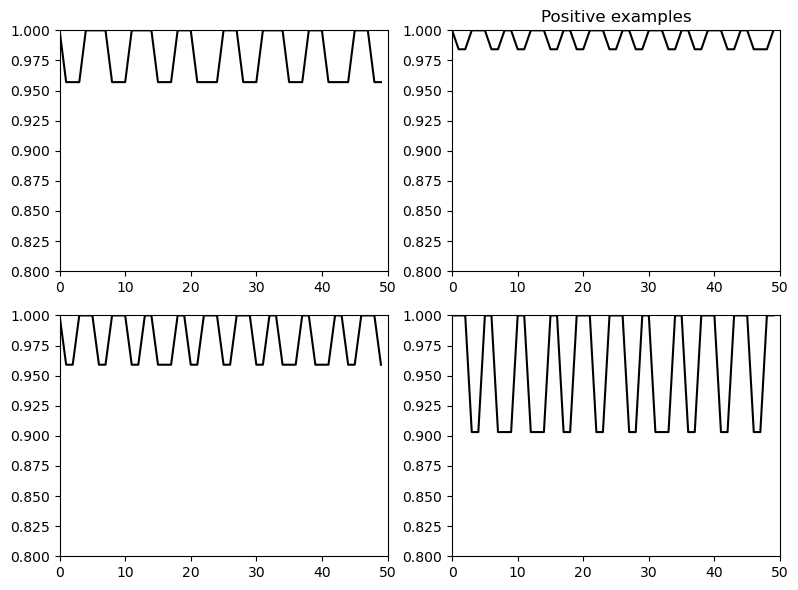

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Set random seed for reproducibility
np.random.seed(42)

# Generate simulated data
num_samples = 10000
num_features = 50
x = np.random.randn(num_samples, num_features)
y = np.zeros(num_samples)

# Define transit function
def transit(t, t0, p, r):
    """
    Computes a simulated transit curve.
    
    Parameters:
    t: numpy array
        Time values.
    t0: float
        Transit center time.
    p: float
        Orbital period.
    r: float
        Radius of planet relative to radius of star.
        
    Returns:
    numpy array
        Simulated transit curve.
    """
    phase = (t - t0) % p
    return np.where(phase < p/2, 1-r, 1)

# Generate random transit parameters for positive examples
for i in range(num_samples // 2):
    t0 = np.random.uniform(0, 1)
    p = np.random.uniform(0.2, 2)
    r = np.random.uniform(0.01, 0.1)
    y[i] = 1
    for j in range(num_features):
        x[i, j] = transit(j, t0, p, r)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Define neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=num_features, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train neural network
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate performance on simulated test set
y_pred = model.predict(x_test)
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

# Generate example transit curves
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    t0 = np.random.uniform(0, 1)
    p = np.random.uniform(0.2, 2)
    r = np.random.uniform(0.01, 0.1)
    transit_curve = transit(np.arange(num_features), t0, p, r)
    plt.plot(transit_curve, 'k-')
    plt.xlim([0, num_features])
    plt.ylim([0.8, 1])
    if i == 1:
        plt.title('Positive examples')
plt.tight_layout()
plt.show()
